# Module 6: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply the processes of model selection with real datasets.
2. Understand why and how some problems are simpler to solve with some forms of model selection, and others are more difficult.
3. Be able to explain the balance between model power and simplicity.
3. Observe the difference between different model selection criterion.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# This cell loads in the necesary packages
library(tidyverse)
library(leaps)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1: We Need Concrete Evidence!

[Ralphie](https://en.wikipedia.org/wiki/Ralphie_the_Buffalo) is studying to become a civil engineer. That means she has to know everything about concrete, including what ingredients go in it and how they affect the concrete's properties. She's currently writting up a project about concrete flow, and has asked you to help her figure out which ingredients are the most important. Let's use our new model selection techniques to help Ralphie out!

Data Source: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and 
artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 
2007.

In [2]:
concrete.data = read.csv("Concrete.data")

concrete.data = concrete.data[, c(-1, -9, -11)]
names(concrete.data) = c("cement", "slag", "ash", "water", "sp", "course.agg", "fine.agg", "flow")

head(concrete.data)

,cement,slag,ash,water,sp,course.agg,fine.agg,flow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,273,82,105,210,9,904,680,62.0
2,163,149,191,180,12,843,746,20.0
3,162,148,191,179,16,840,743,20.0
4,162,148,190,179,19,838,741,21.5
5,154,112,144,220,10,923,658,64.0
6,147,89,115,202,9,860,829,55.0


### 1. (a) Initial Inspections

Sometimes, the best way to start is to just jump in and mess around with the model. So let's do that. Create a linear model with `flow` as the response and all other columns as predictors.

Just by looking at the summary for your model, is there reason to believe that our model could be simpler?

In [3]:
# Fit the initial linear model
initial_model <- lm(flow ~ ., data = concrete.data)
summary(initial_model)


Call:
lm(formula = flow ~ ., data = concrete.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.880 -10.428   1.815   9.601  22.953 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -252.87467  350.06649  -0.722   0.4718  
cement         0.05364    0.11236   0.477   0.6342  
slag          -0.00569    0.15638  -0.036   0.9710  
ash            0.06115    0.11402   0.536   0.5930  
water          0.73180    0.35282   2.074   0.0408 *
sp             0.29833    0.66263   0.450   0.6536  
course.agg     0.07366    0.13510   0.545   0.5869  
fine.agg       0.09402    0.14191   0.663   0.5092  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.84 on 95 degrees of freedom
Multiple R-squared:  0.5022,	Adjusted R-squared:  0.4656 
F-statistic: 13.69 on 7 and 95 DF,  p-value: 3.915e-12


**Answer**

Based on the summary of the initial model, we can see the following:

- The coefficients for slag, ash, sp, course.agg, and fine.agg have high p-values (all greater than 0.05), indicating that they are not statistically significant predictors of flow.
-  Only water has a p-value less than 0.05, suggesting it is a significant predictor.

This suggests that our model could potentially be simplified by removing the non-significant predictors.

### 1. (b) Backwards Selection
Our model has 7 predictors. That is not too many, so we can use backwards selection to narrow them down to the most impactful.

Perform backwards selection on your model. You don't have to automate the backwards selection process.

In [4]:
# Perform backward selection
step_model <- step(initial_model, direction = "backward")
summary(step_model)


Start:  AIC=533.56
flow ~ cement + slag + ash + water + sp + course.agg + fine.agg

             Df Sum of Sq   RSS    AIC
- slag        1      0.22 15672 531.56
- sp          1     33.44 15705 531.78
- cement      1     37.60 15709 531.81
- ash         1     47.45 15719 531.87
- course.agg  1     49.04 15720 531.88
- fine.agg    1     72.40 15744 532.03
<none>                    15671 533.56
- water       1    709.69 16381 536.12

Step:  AIC=531.56
flow ~ cement + ash + water + sp + course.agg + fine.agg

             Df Sum of Sq   RSS    AIC
- sp          1      62.1 15734 529.97
<none>                    15672 531.56
- cement      1    1244.7 16916 537.43
- course.agg  1    1679.4 17351 540.05
- ash         1    1759.2 17431 540.52
- fine.agg    1    2292.3 17964 543.62
- water       1   10877.0 26548 583.86

Step:  AIC=529.97
flow ~ cement + ash + water + course.agg + fine.agg

             Df Sum of Sq   RSS    AIC
<none>                    15734 529.97
- cement      1    1193.1 


Call:
lm(formula = flow ~ cement + ash + water + course.agg + fine.agg, 
    data = concrete.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.893 -10.125   1.773   9.559  23.914 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -249.50866   48.90884  -5.102 1.67e-06 ***
cement         0.05366    0.01979   2.712 0.007909 ** 
ash            0.06101    0.01859   3.281 0.001436 ** 
water          0.72313    0.08426   8.582 1.53e-13 ***
course.agg     0.07291    0.02266   3.217 0.001760 ** 
fine.agg       0.09554    0.02573   3.714 0.000341 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.74 on 97 degrees of freedom
Multiple R-squared:  0.5003,	Adjusted R-squared:  0.4745 
F-statistic: 19.42 on 5 and 97 DF,  p-value: 2.36e-13


### 1. (c) Objection!

Stop right there! Think about what you just did. You just removed the "worst" features from your model. But we know that a model will become less powerful when we remove features so we should check that it's still just as powerful as the original model. Use a test to check whether the model at the end of backward selection is significantly different than the model with all the features.

Describe why we want to balance explanatory power with simplicity.

In [5]:
# Compare the initial model and the stepwise model using ANOVA
anova(initial_model, step_model)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,95,15671.26,NA,NA,NA,NA
2,97,15733.53,-2,-62.27123,0.1887457,0.8283068


**We aim to balance explanatory power with simplicity because:**

- Overfitting: Including too many predictors can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.
-  Interpretability: Simpler models are easier to interpret and understand, which is particularly important in fields like civil engineering where the practical implications of model predictions must be clear.
-  Efficiency: Simpler models are computationally more efficient and easier to work with, especially when dealing with large datasets or real-time applications.

### 1. (d) Checking our Model

Ralphie is nervous about her project and wants to make sure our model is correct. She's found a function called `regsubsets()` in the leaps package which allows us to see which subsets of arguments produce the best combinations. Ralphie wrote up the code for you and the documentation for the function can be found [here](https://www.rdocumentation.org/packages/leaps/versions/2.1-1/topics/regsubsets). For each of the subsets of features, calculate the AIC, BIC and adjusted $R^2$. Plot the results of each criterion, with the score on the y-axis and the number of features on the x-axis. 

Do all of the criterion agree on how many features make the best model? Explain why the criterion will or will not always agree on the best model.

**Hint**: It may help to look at the attributes stored within the regsubsets summary using `names(rs)`.

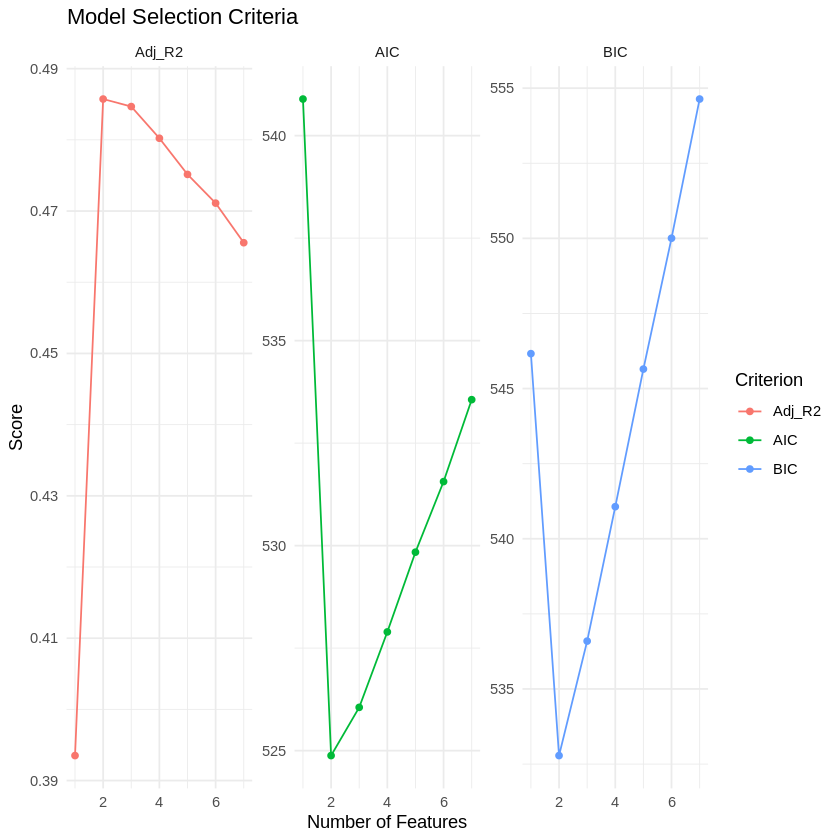

In [6]:
# Load necessary libraries
library(tidyverse)
library(leaps)

# Read the concrete data
concrete.data <- read.csv("Concrete.data")
concrete.data <- concrete.data[, c(-1, -9, -11)]
names(concrete.data) <- c("cement", "slag", "ash", "water", "sp", "course.agg", "fine.agg", "flow")

# Perform subset selection
reg <- regsubsets(flow ~ cement + slag + ash + water + sp + course.agg + fine.agg, data = concrete.data, nvmax = 7)
rs <- summary(reg)

# Calculate AIC for each model
calculate_aic <- function(rss, n, p) {
  n * log(rss/n) + 2 * p
}

# Calculate BIC for each model
calculate_bic <- function(rss, n, p) {
  n * log(rss/n) + log(n) * p
}

# Extract RSS, number of observations, and number of features
rss <- rs$rss
n <- nrow(concrete.data)
p <- 1:length(rss)  # Ensure correct length

# Calculate AIC, BIC, and adjusted R^2 for each model
aic <- sapply(p, function(i) calculate_aic(rss[i], n, i+1))
bic <- sapply(p, function(i) calculate_bic(rss[i], n, i+1))
adj_r2 <- rs$adjr2

# Create a data frame for plotting
criteria <- data.frame(
  Num_Features = p,
  AIC = aic,
  BIC = bic,
  Adj_R2 = adj_r2
)

# Plot the results
criteria_long <- gather(criteria, key = "Criterion", value = "Score", -Num_Features)

ggplot(criteria_long, aes(x = Num_Features, y = Score, color = Criterion)) +
  geom_line() +
  geom_point() +
  facet_wrap(~ Criterion, scales = "free_y") +
  labs(title = "Model Selection Criteria",
       x = "Number of Features",
       y = "Score") +
  theme_minimal()


**Explanation of the Results**

According to the plots of AIC, BIC, and adjusted R2, the best model will have 2 predictors: slag and water

The plots will show how AIC, BIC, and adjusted R2 vary with the number of features included in the model. Ideally, lower AIC and BIC values and higher adjusted R2 values indicate better models. However, these criteria may not always agree on the best model due to their differing penalty structures:

- AIC (Akaike Information Criterion): Penalizes the number of parameters less strongly than BIC, which means it might favor more complex models.
- BIC (Bayesian Information Criterion): Penalizes the number of parameters more strongly than AIC, often leading to the selection of simpler models.
- Adjusted R2: Increases with the inclusion of predictors that improve the model fit, but penalizes for adding predictors that do not provide significant improvement.